# Introduction to Scikit Learn and Model Evaluation
This notebook represents the first exercises within Chapter 2

In [1]:
#Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Settings for Rendering plots
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

# Read in data
df = pd.read_csv("Data/Chapter_1_cleaned_data.csv")

In [2]:
# Check the propoprtion of output in the positive class
df["default payment next month"].mean()

0.2217971797179718

In [3]:
# The number of observations in each class
df.groupby("default payment next month")["ID"].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

# Begin using Machine Learning algorithims

- Using logistic regression as an example
    - It is good practice to initialise calls to Sckit learn with all of the required variables to maintain a good overview

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
my_lr = LogisticRegression()

In [6]:
help(my_lr)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [7]:
my_new_lr = LogisticRegression(C = 1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, 
                               max_iter = 100, multi_class = 'auto', n_jobs = None, penalty = 'l2', random_state = None,
                              solver = 'warn', tol = 0.0001, verbose = 0, warm_start = False)

In [8]:
# Set values as necessary
my_new_lr.C = 0.1
my_new_lr.solver = "liblinear"
my_new_lr.penalty = "l2"
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [9]:
# Sample model syntax
X = df["EDUCATION"][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [10]:
Y = df["default payment next month"][0:10].values
Y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
my_new_lr.fit(X,Y)

LogisticRegression(C=0.1, solver='liblinear')

In [12]:
# Make predictions with the newly trained model
new_X = df["EDUCATION"][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [13]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
df["default payment next month"][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

# Exercise 1
- Generate synthetic data
- FIt a line of best fit using Sckit learn

In [15]:
np.random.seed(seed = 1)

In [16]:
# Generate syntheric observations of an explanatory variable
X = np.random.uniform(low = 0.0, high = 10.0, size = (1000,))
X

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00, 1.93669579e-01, 6.78835533e+00,
       2.11628116e+00, 2.65546659e+00, 4.91573159e+00, 5.33625451e-01,
      

In [17]:
# Generate Response variables for X
np.random.seed(seed = 1)
slope = 0.25
intercept = -1.25

Y = slope * X + intercept + np.random.normal(loc = 0, scale = 1.0, size = (1000,))

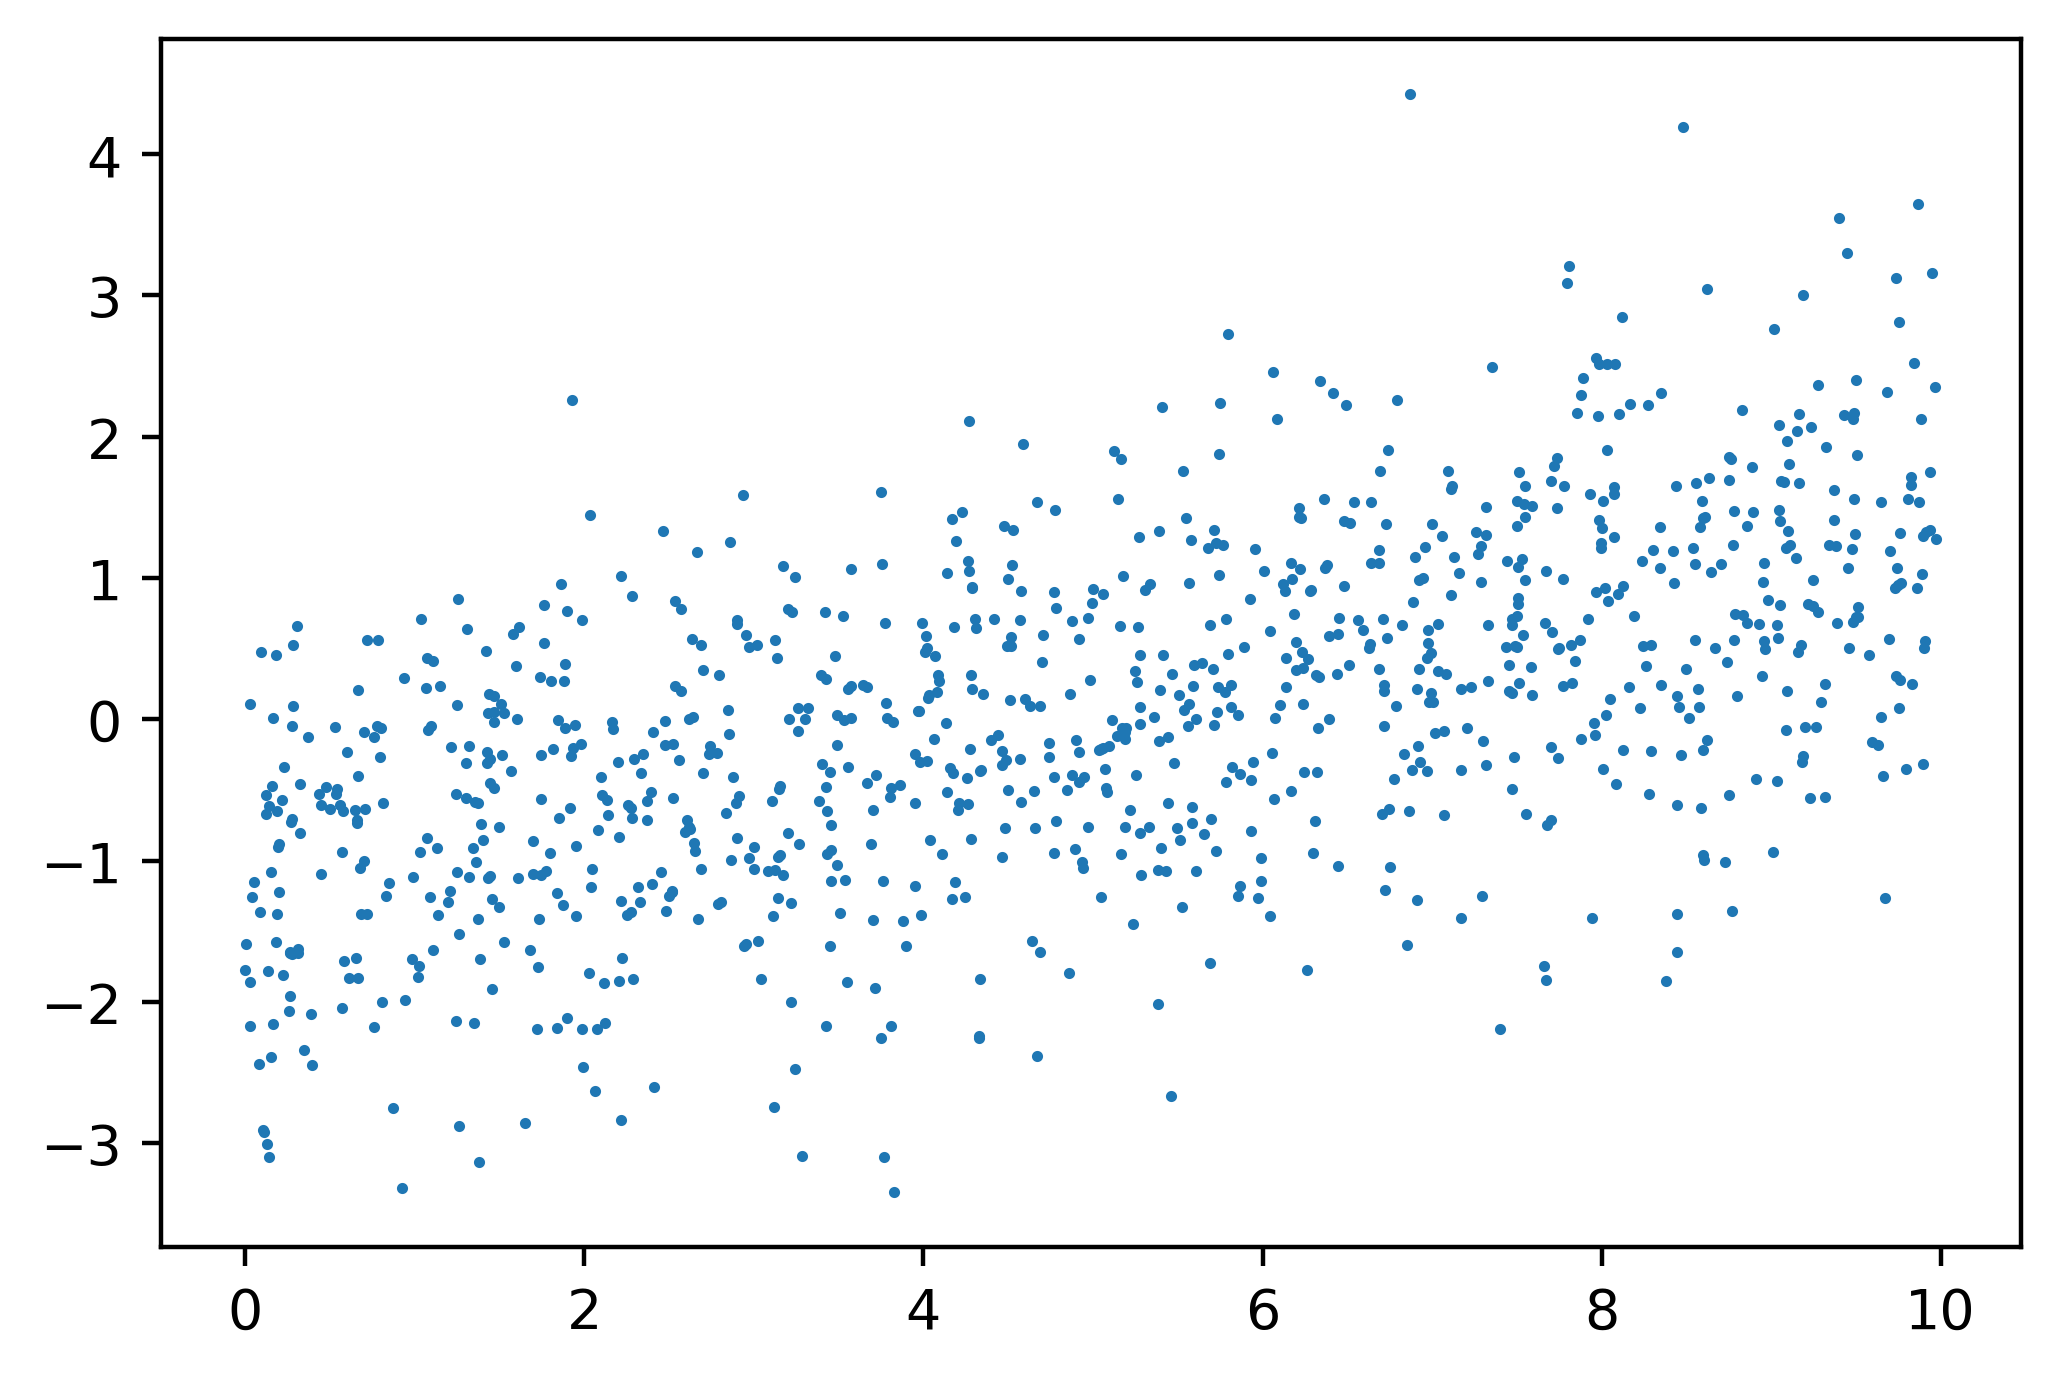

In [18]:
# Visualise the data
plt.scatter(X,Y,s=1)

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [20]:
X_reshape = X.reshape(-1,1)
lin_reg.fit(X_reshape,Y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1612566002825873
[0.24002588]


In [21]:
y_pred = lin_reg.predict(X_reshape)

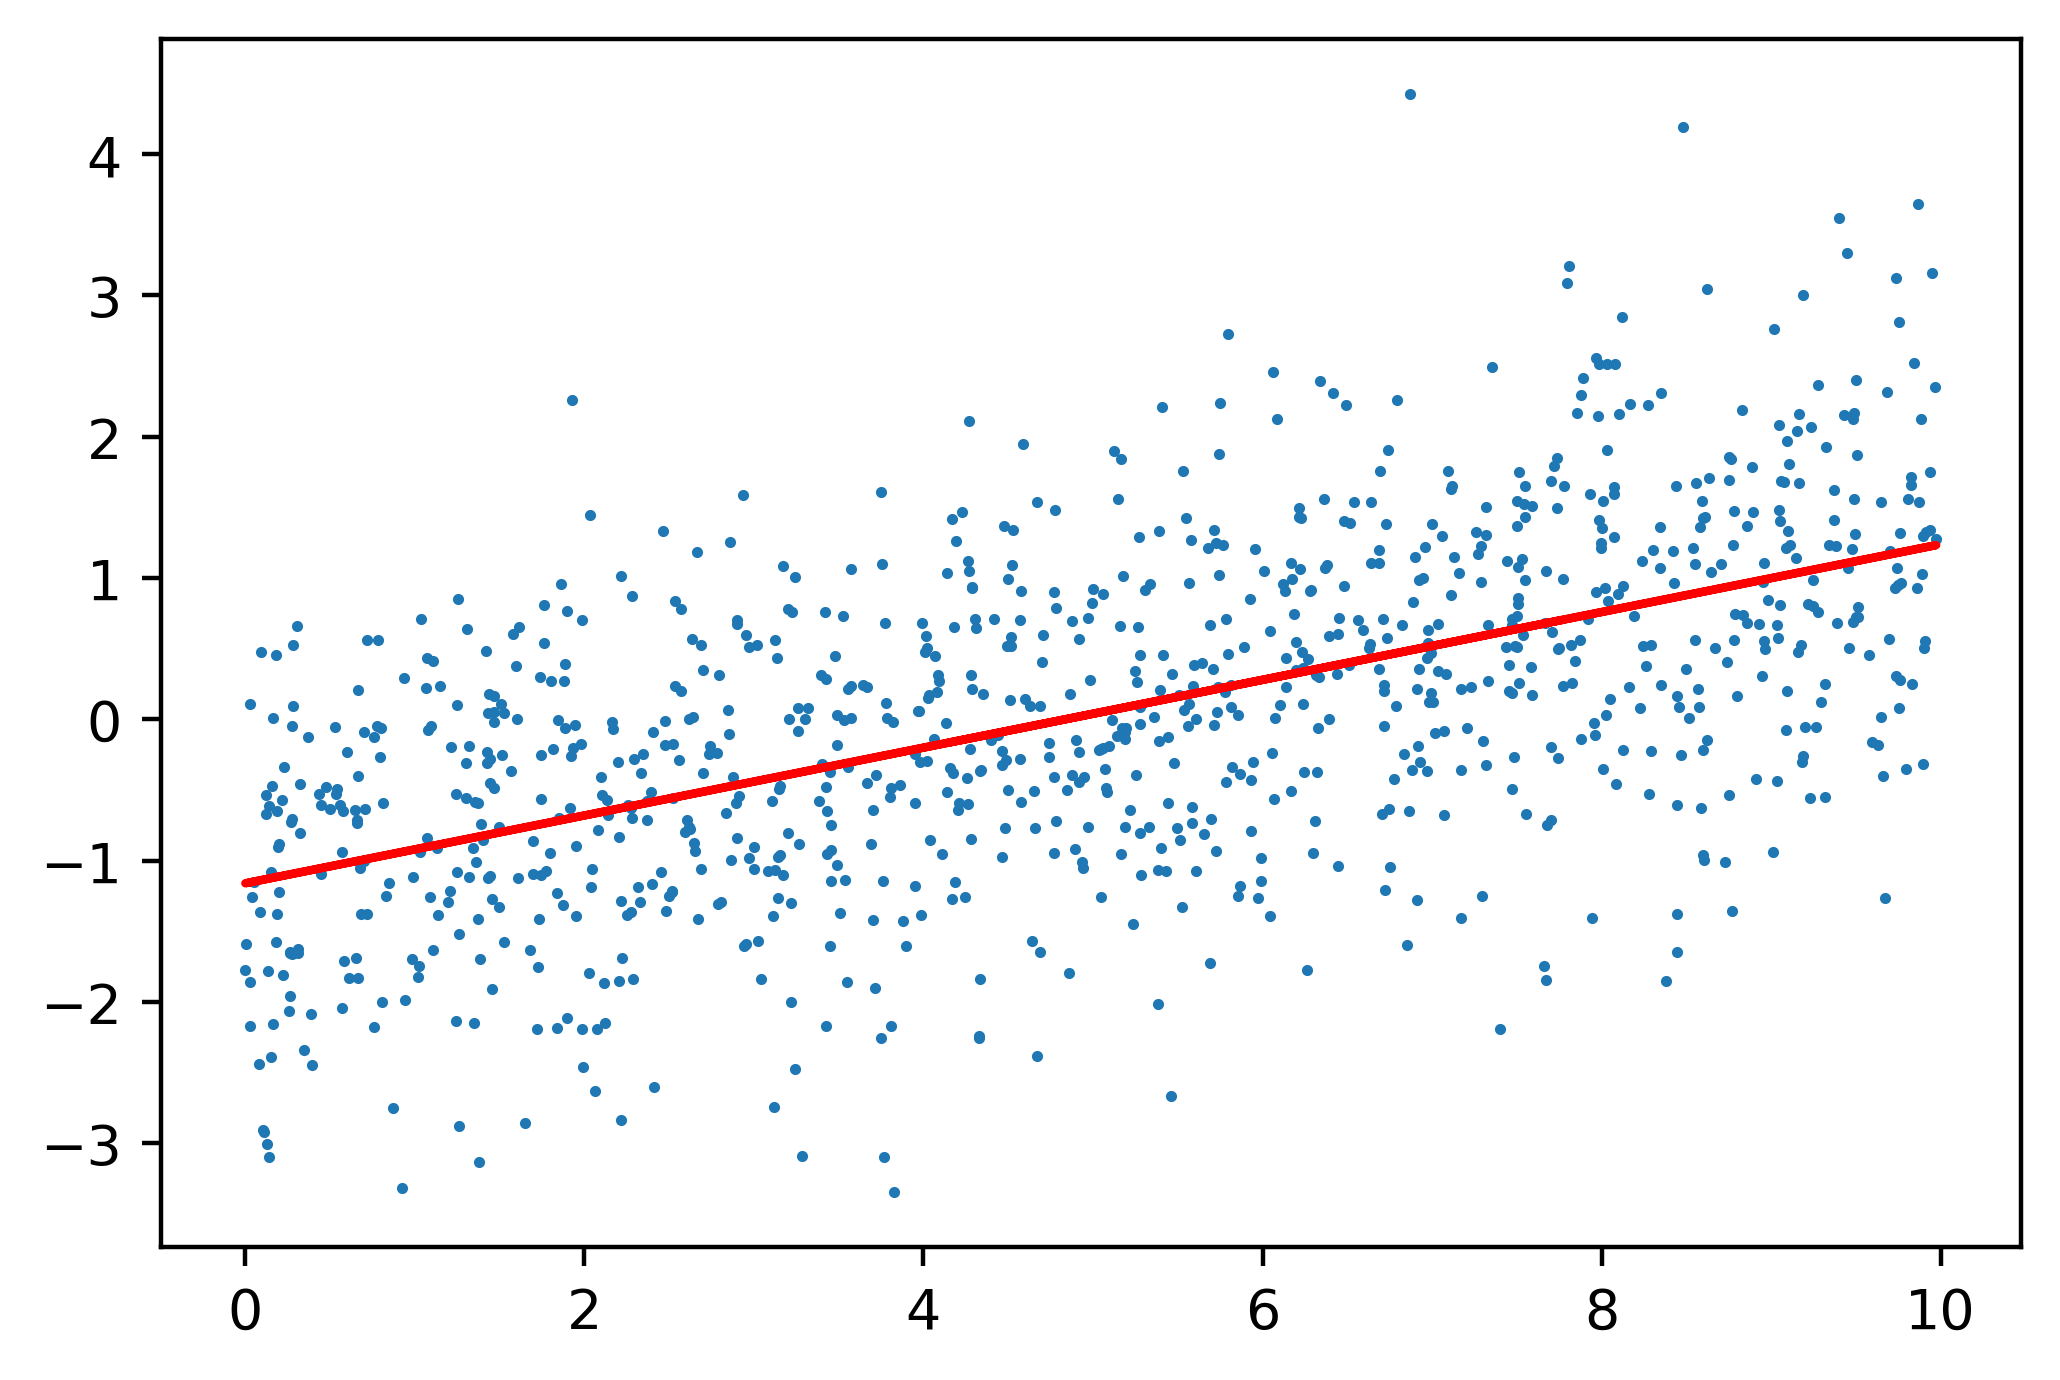

In [22]:
plt.scatter(X,Y,s=1)
plt.plot(X,y_pred,"r")

# Training vs Test data

This is a fundamental concept in predictive modelling. That we have a set of points on which the model can learn, and another set of points where we can "test" the model against known values

- Split data into that used for parametrisation (learning) and that used to test the model

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df["EDUCATION"].values.reshape(-1,1), df["default payment next month"].values,
                                                   test_size = 0.2, random_state = 24)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [25]:
print(np.mean(Y_train))
print(np.mean(Y_test))

0.223102526838873
0.21657603600225014


# Classification Accuracy

- Accuracy = The proportion of predictions which were assigned correctly (compared to the test data)
    - Can then be compared to a null-model that compares the accuracy to simple case where we ignore the features and allocate every observation to the majority class
   
- True Positive Rate = The proportion of positive classes we correctly guessed
- False Negative Rate = The proportion of positive classes we incorrectly predicted as negative
 - TPR + FNR = !
 - Converse also exists. True Negative Rate and False Positive Rate
 - All metrics combined in a 2x2 matrix called a "Confusion Matrix"

In [26]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C = 0.1, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1,
                               max_iter = 100, multi_class = "auto", n_jobs = None, penalty = "l2", random_state = None,
                               solver = "liblinear", tol = 0.0001, verbose = 0, warm_start = False)

In [27]:
example_lr.fit(X_train,Y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [28]:
Y_pred = example_lr.predict(X_test)

In [29]:
is_correct = Y_pred == Y_test
np.mean(is_correct)

0.7834239639977498

In [30]:
example_lr.score(X_test,Y_test)

0.7834239639977498

In [31]:
from sklearn import metrics
metrics.accuracy_score(Y_test,Y_pred)

0.7834239639977498

In [32]:
P = sum(Y_test)
P

1155

In [33]:
TP = sum( (Y_test == 1) & (Y_pred == 1))
TP

0

In [34]:
TPR = TP / P
TPR

0.0

In [35]:
FN = sum((Y_test == 1) & (Y_pred == 0))
FN

1155

In [36]:
FNR = FN/P
FNR

1.0

In [37]:
N = sum(Y_test == 0)
N

4178

In [38]:
TN = sum((Y_test == 0) & (Y_pred == 0))
TN

4178

In [39]:
FP = sum((Y_test == 0) & (Y_pred == 1))
FP

0

In [40]:
TNR = TN/N
FP = FP/N
print("The true negative rate is {} and the false positive rate is {}".format(TNR,FP))

The true negative rate is 1.0 and the false positive rate is 0.0


In [41]:
metrics.confusion_matrix(Y_test,Y_pred)

array([[4178,    0],
       [1155,    0]])

# Delving Deeper into Logistic Regression

- Retrive Predicted probabilities from the model
- Visualise how the negative and positive class predictions are made up

In [42]:
Y_pred_proba = example_lr.predict_proba(X_test)
Y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [43]:
prob_sum= np.sum(Y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [44]:
prob_sum.shape

(5333,)

In [45]:
np.unique(prob_sum)

array([1.])

In [46]:
pos_proba = Y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

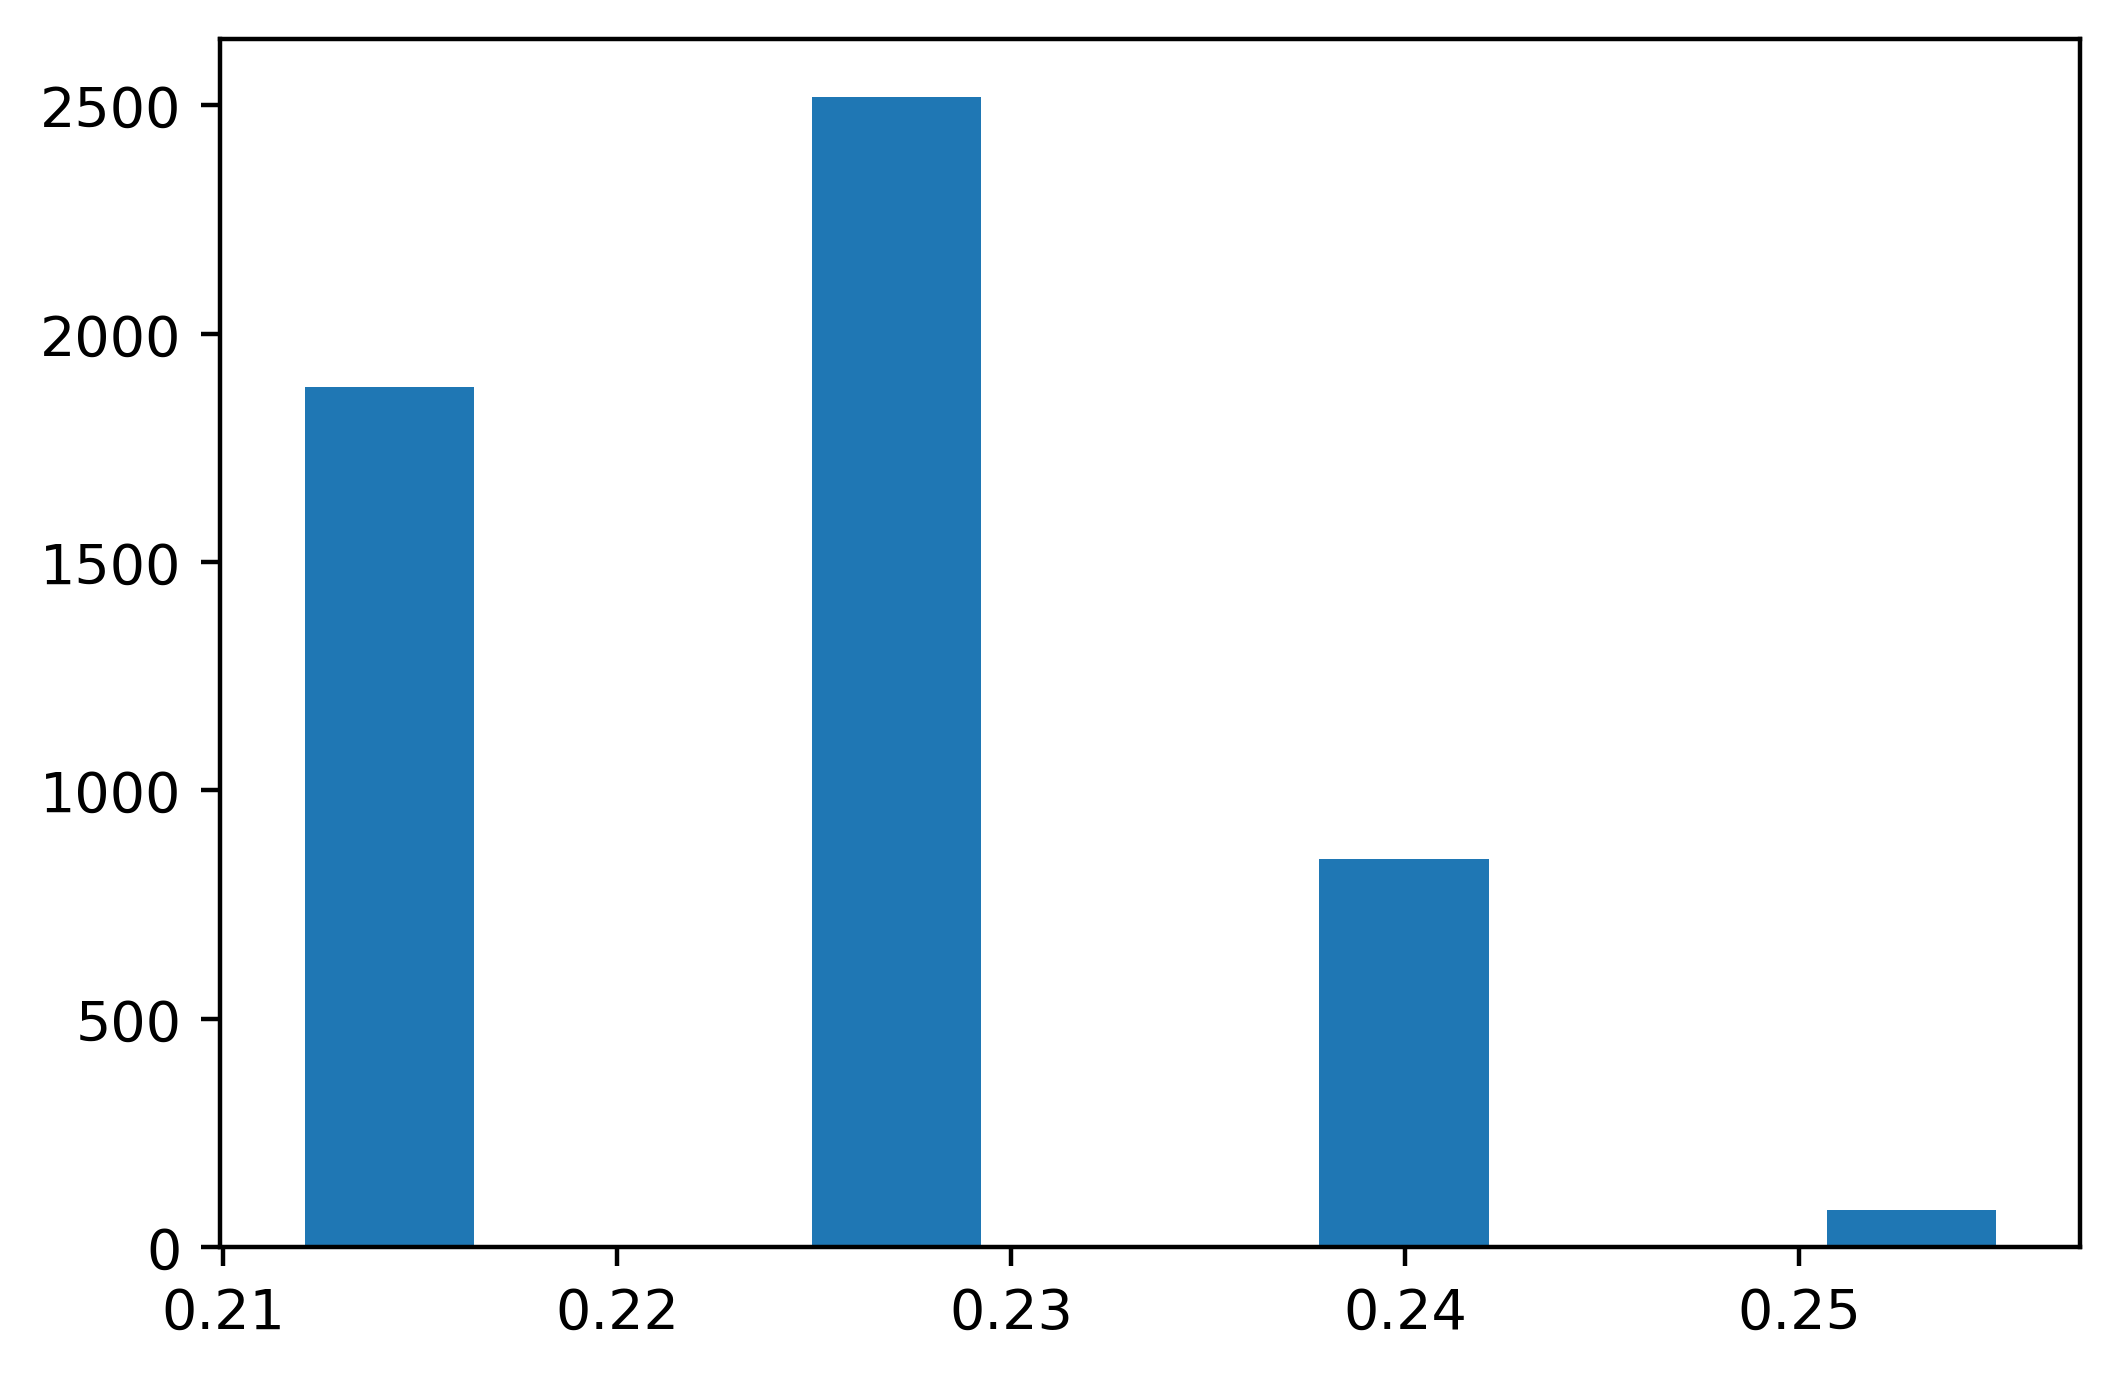

In [47]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of Samples')

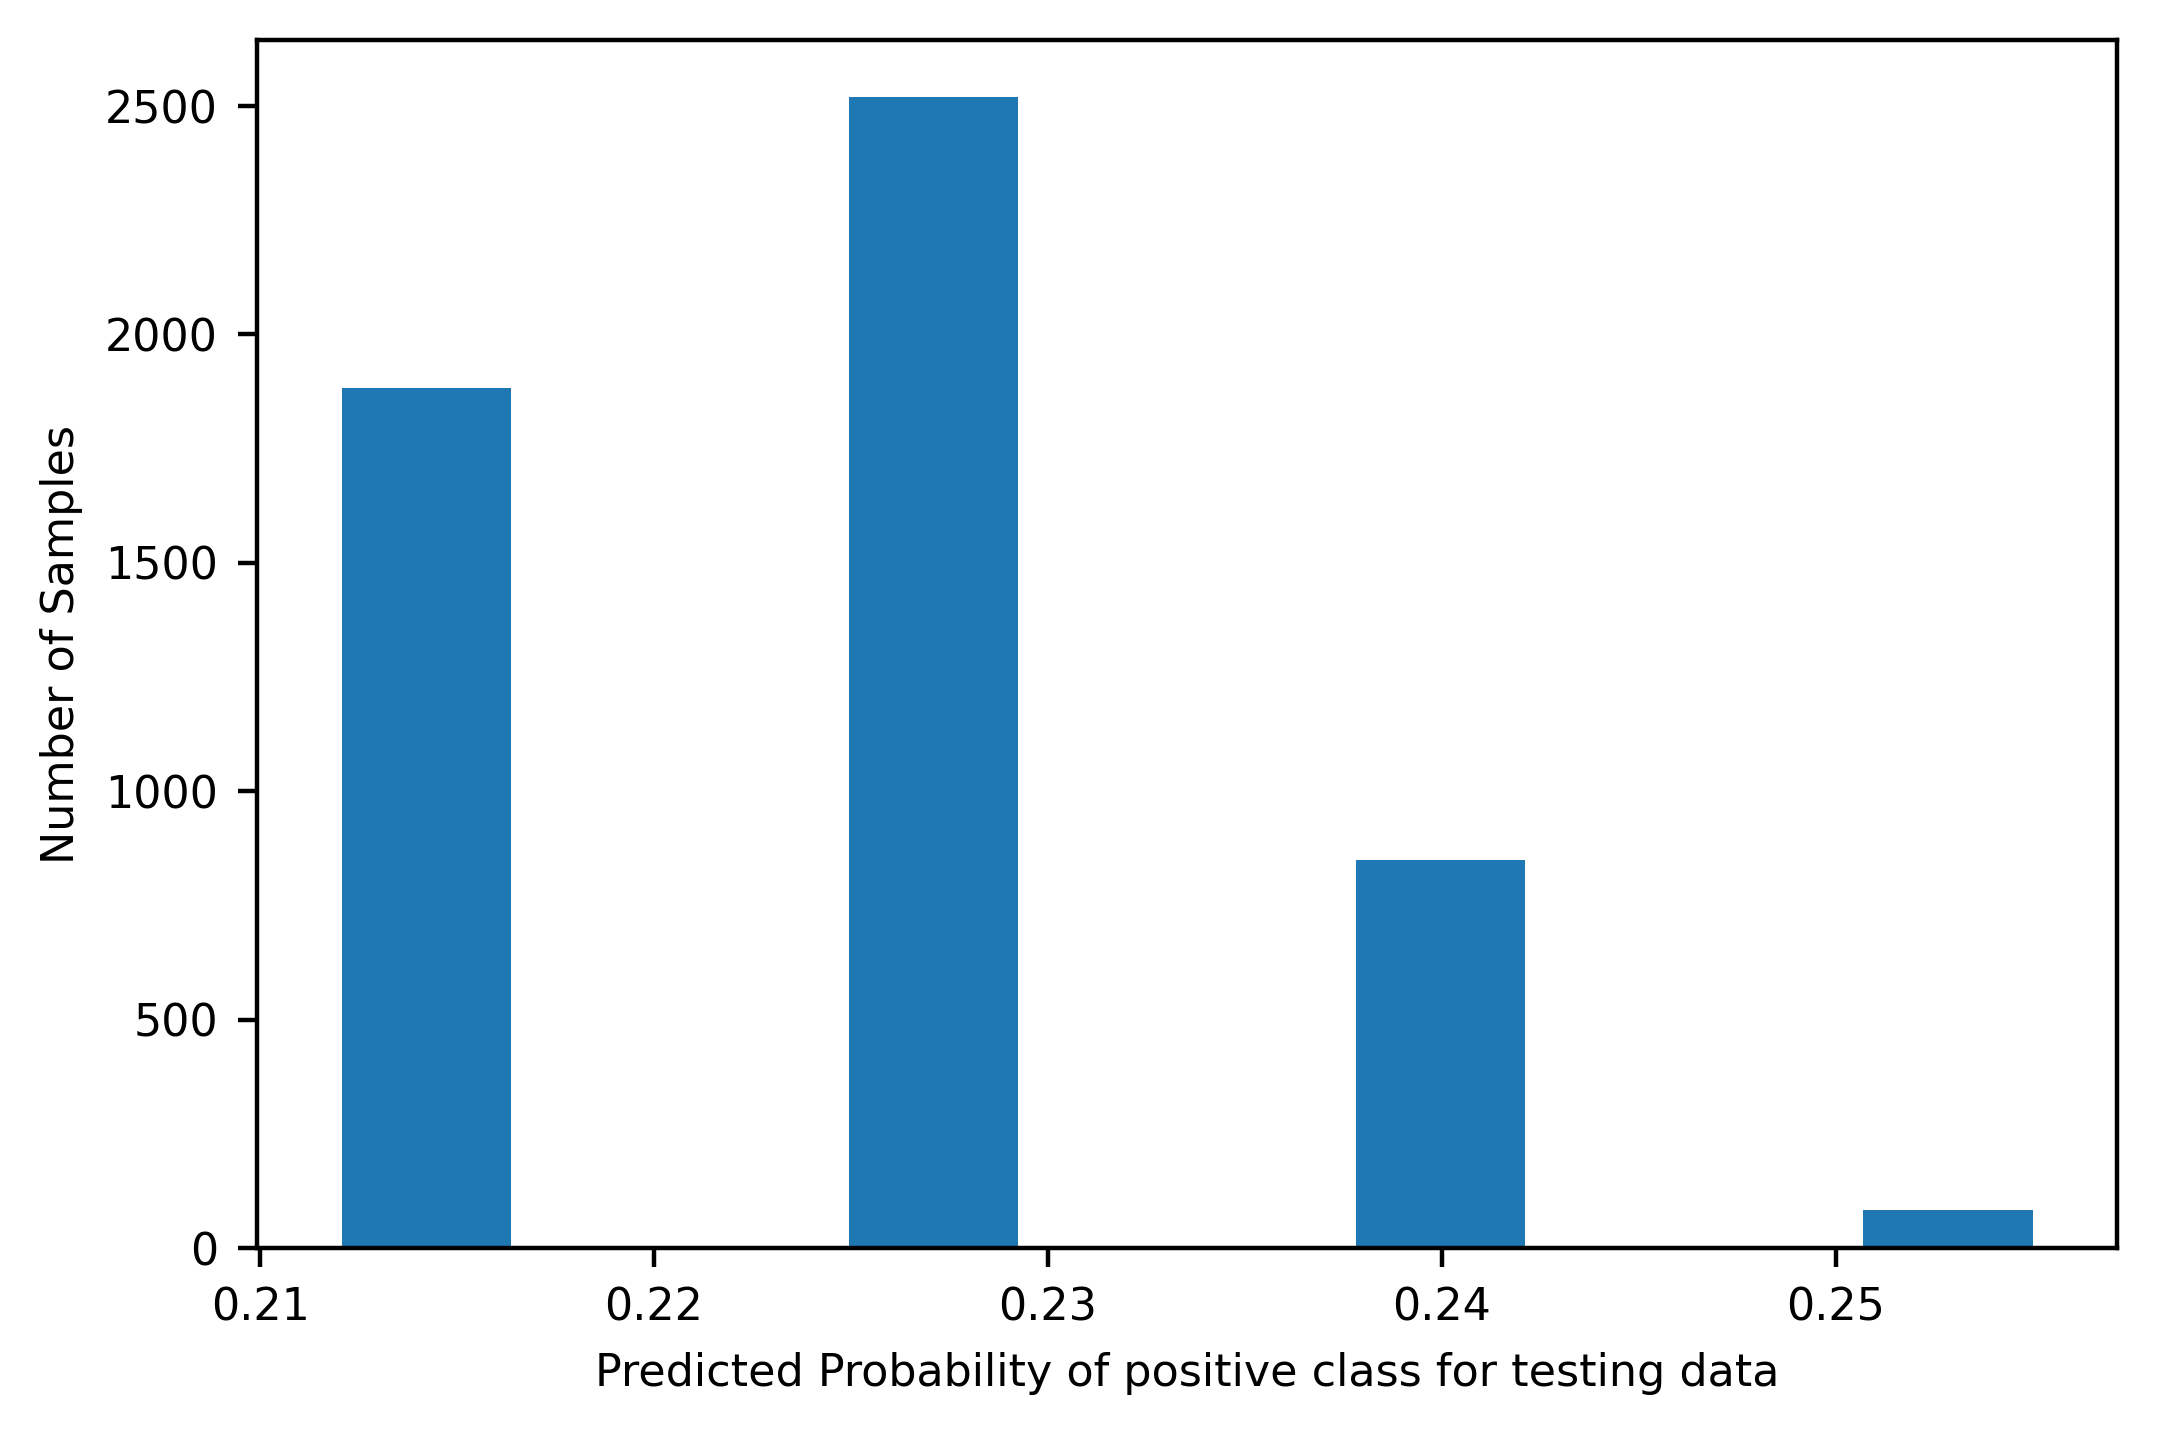

In [63]:
mpl.rcParams["font.size"] = 8
plt.hist(pos_proba)
plt.xlabel("Predicted Probability of positive class for testing data")
plt.ylabel("Number of Samples")

In [49]:
pos_sample_pos_proba = pos_proba[Y_test == 1]
neg_sample_pos_proba = pos_proba[Y_test == 0]
print(neg_sample_pos_proba.shape)
print(pos_sample_pos_proba.shape)

(4178,)
(1155,)


Text(0, 0.5, 'Number of samples')

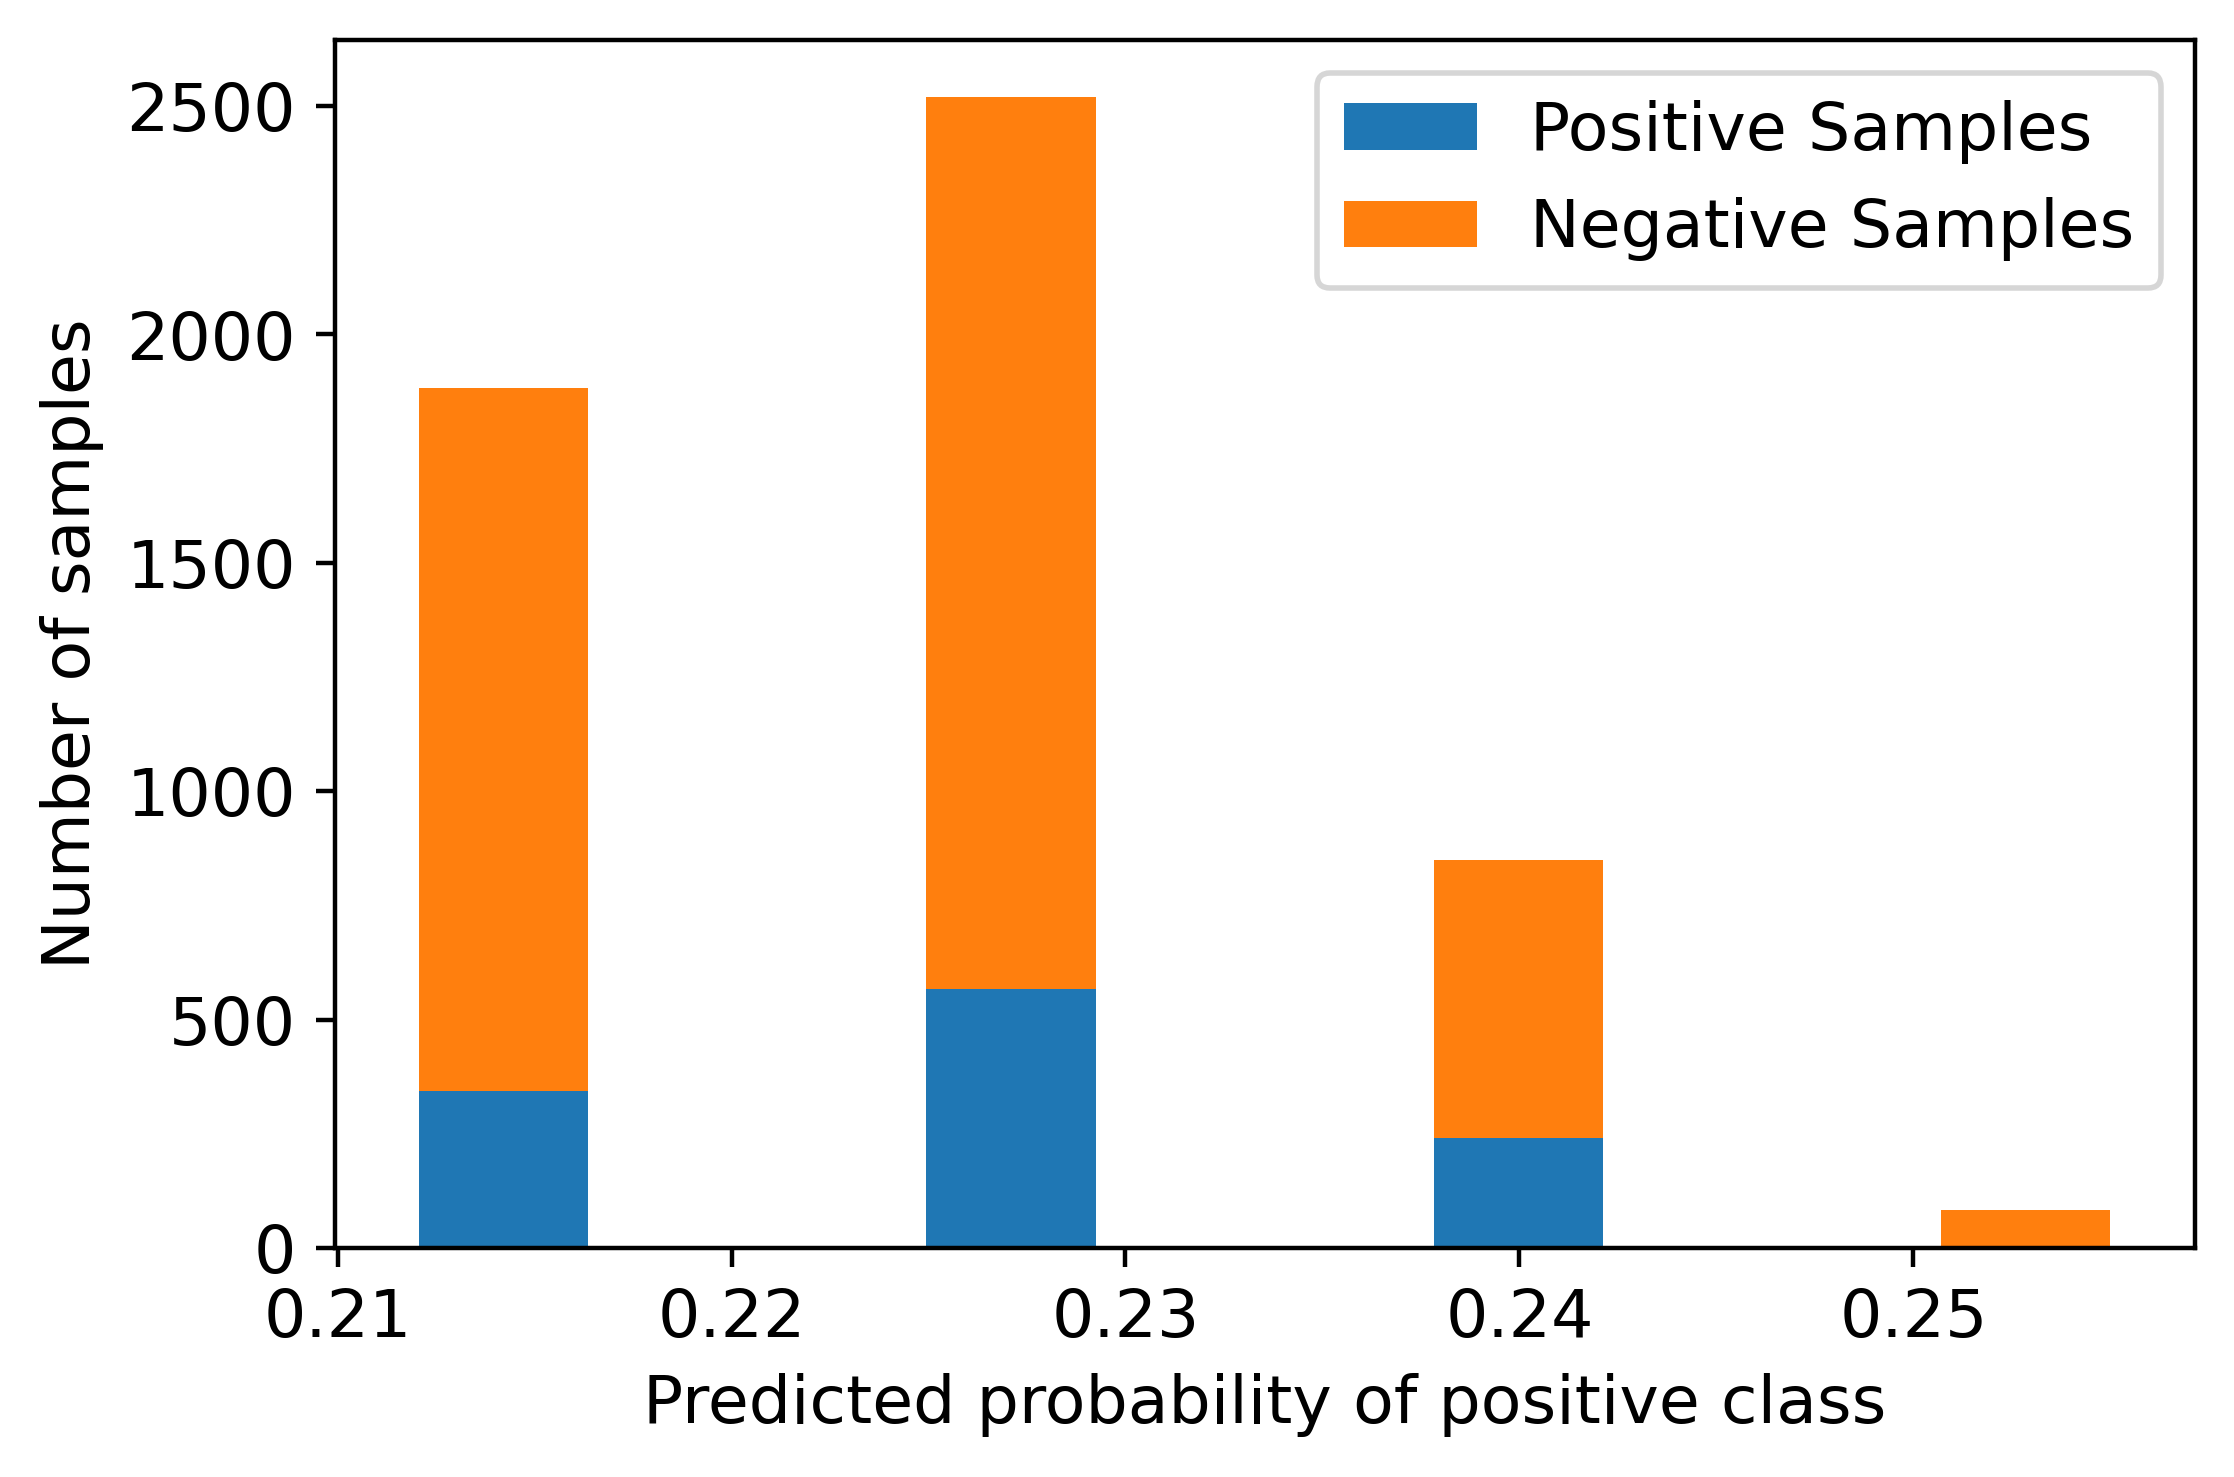

In [50]:
plt.hist([pos_sample_pos_proba,neg_sample_pos_proba], histtype = "barstacked")
plt.legend(["Positive Samples","Negative Samples"])
plt.xlabel("Predicted probability of positive class")
plt.ylabel("Number of samples")

# The receiver operating characteristic curve

- Helps to visualise how the threshold should be set for logistic regression
 - A good identifier should "hug" the top left of the graph
 - The arear under the curve of the ROC should be between 0.5 (Random chance) and 1 (Perfect prediction)
 - The area under the ROC Curve is known as the C-Statistic

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pos_proba)

Text(0.5, 1.0, 'ROC Curve')

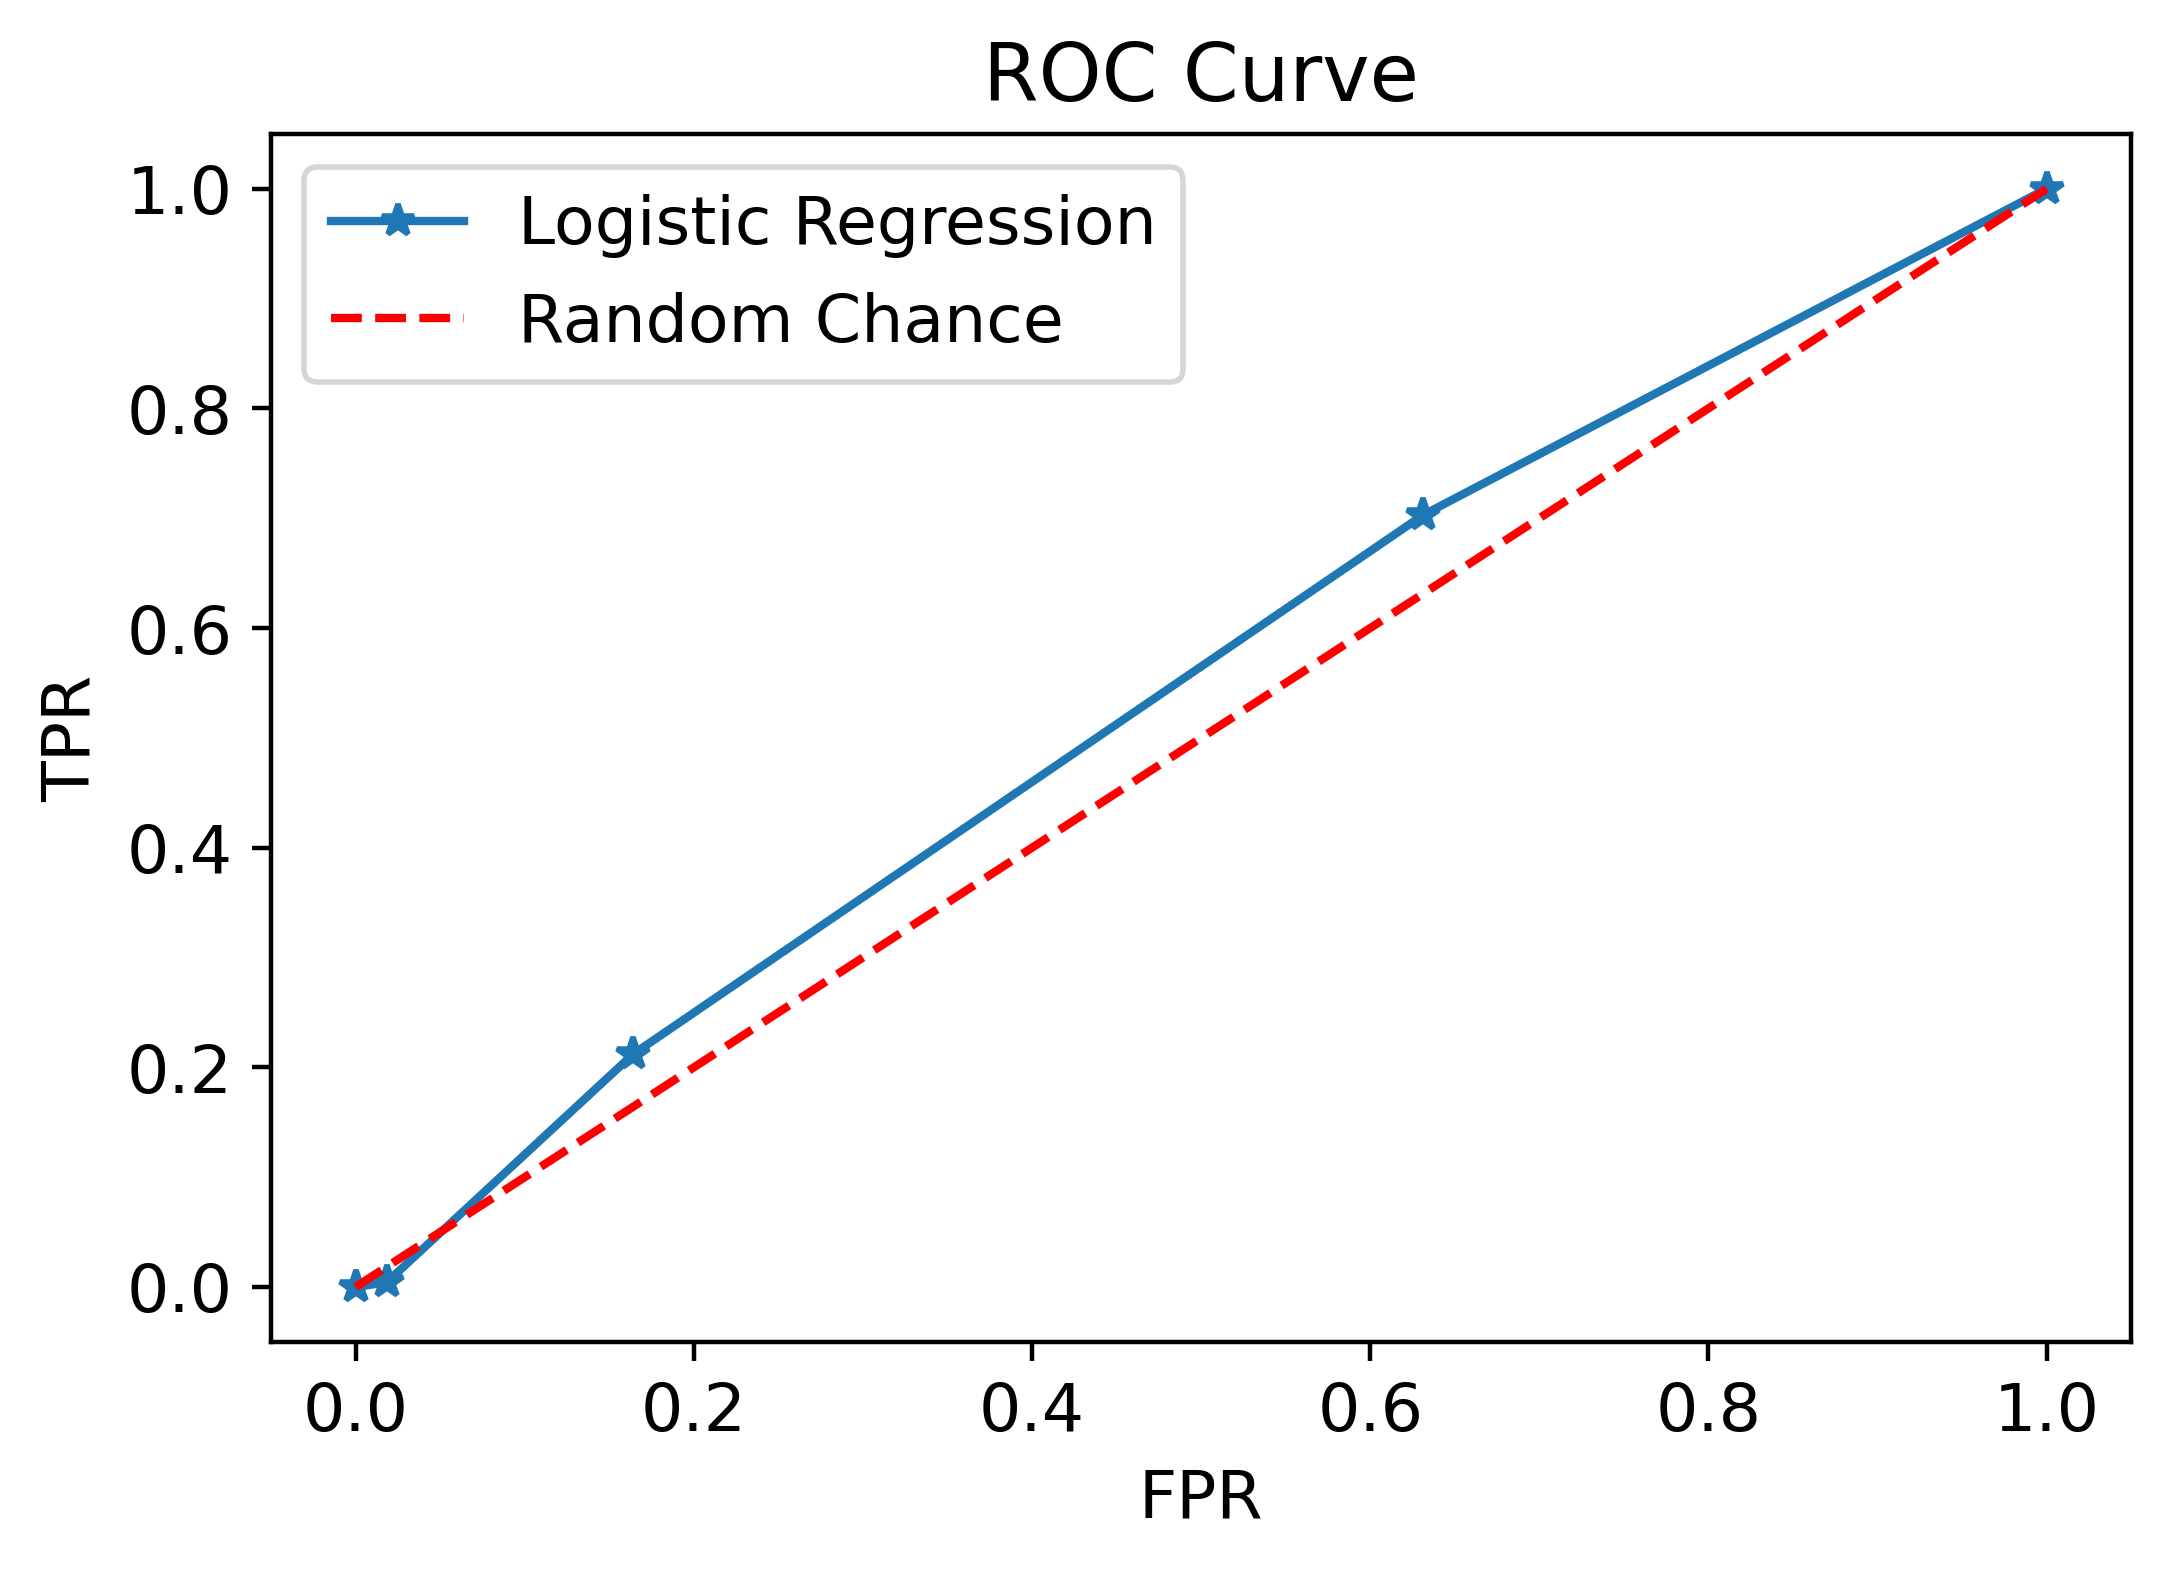

In [52]:
plt.plot(fpr,tpr,"*-")
plt.plot([0,1],[0,1], "r--")
plt.legend(["Logistic Regression", "Random Chance"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

In [53]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [54]:
metrics.roc_auc_score(Y_test, pos_proba)

0.5434650477972642

# Precision

- Precision = TP /(TP + FP)

# Activity 2

In [55]:
from sklearn.model_selection import train_test_split

X_train_act, X_test_act, Y_train_act, Y_test_act = train_test_split(df["LIMIT_BAL"].values.reshape(-1,1), df["default payment next month"].values,
                                                   test_size = 0.2, random_state = 24)

In [56]:
activity_logistic_reg = LogisticRegression()
activity_logistic_reg.fit(X_train_act,Y_train_act)

LogisticRegression()

In [57]:
predicted_probabilities = activity_logistic_reg.predict_proba(X_test_act)

In [58]:
positive_predicted_probabilities = predicted_probabilities[:,1]
positive_predicted_probabilities
metrics.roc_auc_score(Y_test_act,positive_predicted_probabilities)

0.6201990844642832

In [59]:
fpr_act, tpr_act, thresholds_act = metrics.roc_curve(Y_test_act, positive_predicted_probabilities)

Text(0.5, 1.0, 'ROC Curve')

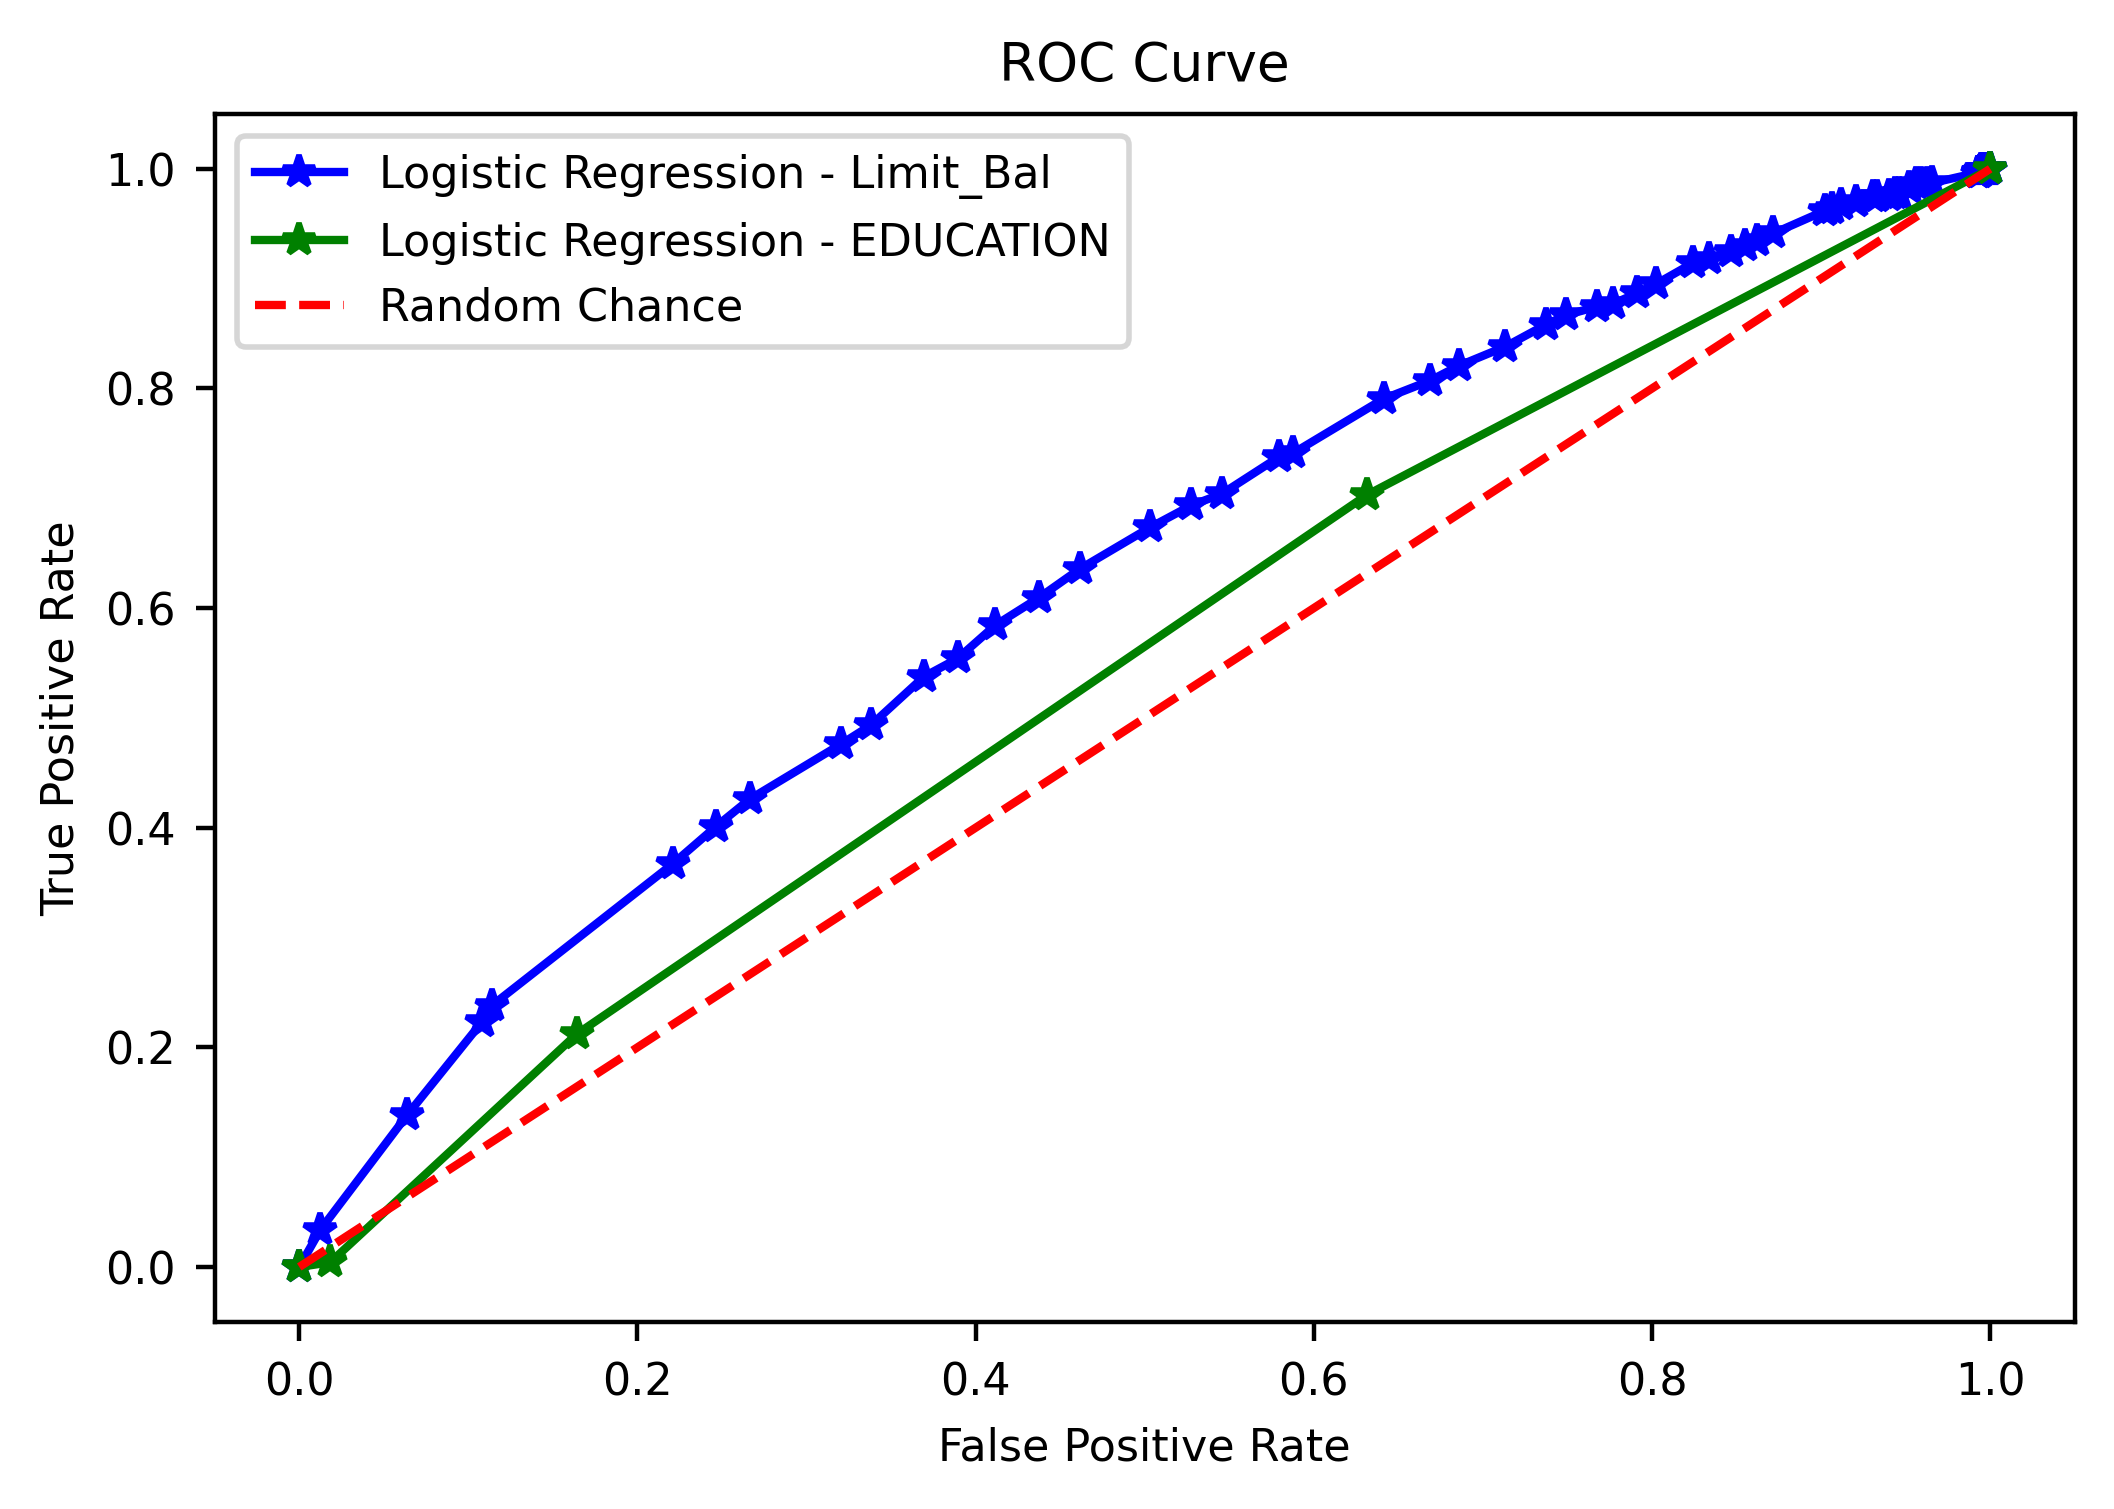

In [64]:
plt.plot(fpr_act,tpr_act,"b*-")
plt.plot(fpr,tpr,"g*-")
plt.plot([0,1],[0,1],"r--")
plt.legend(["Logistic Regression - Limit_Bal","Logistic Regression - EDUCATION","Random Chance"])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

In [68]:
precision_act, recall_act, thresholds_act = metrics.precision_recall_curve(Y_test_act, positive_predicted_probabilities)
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, pos_proba)

Text(0, 0.5, 'Recall')

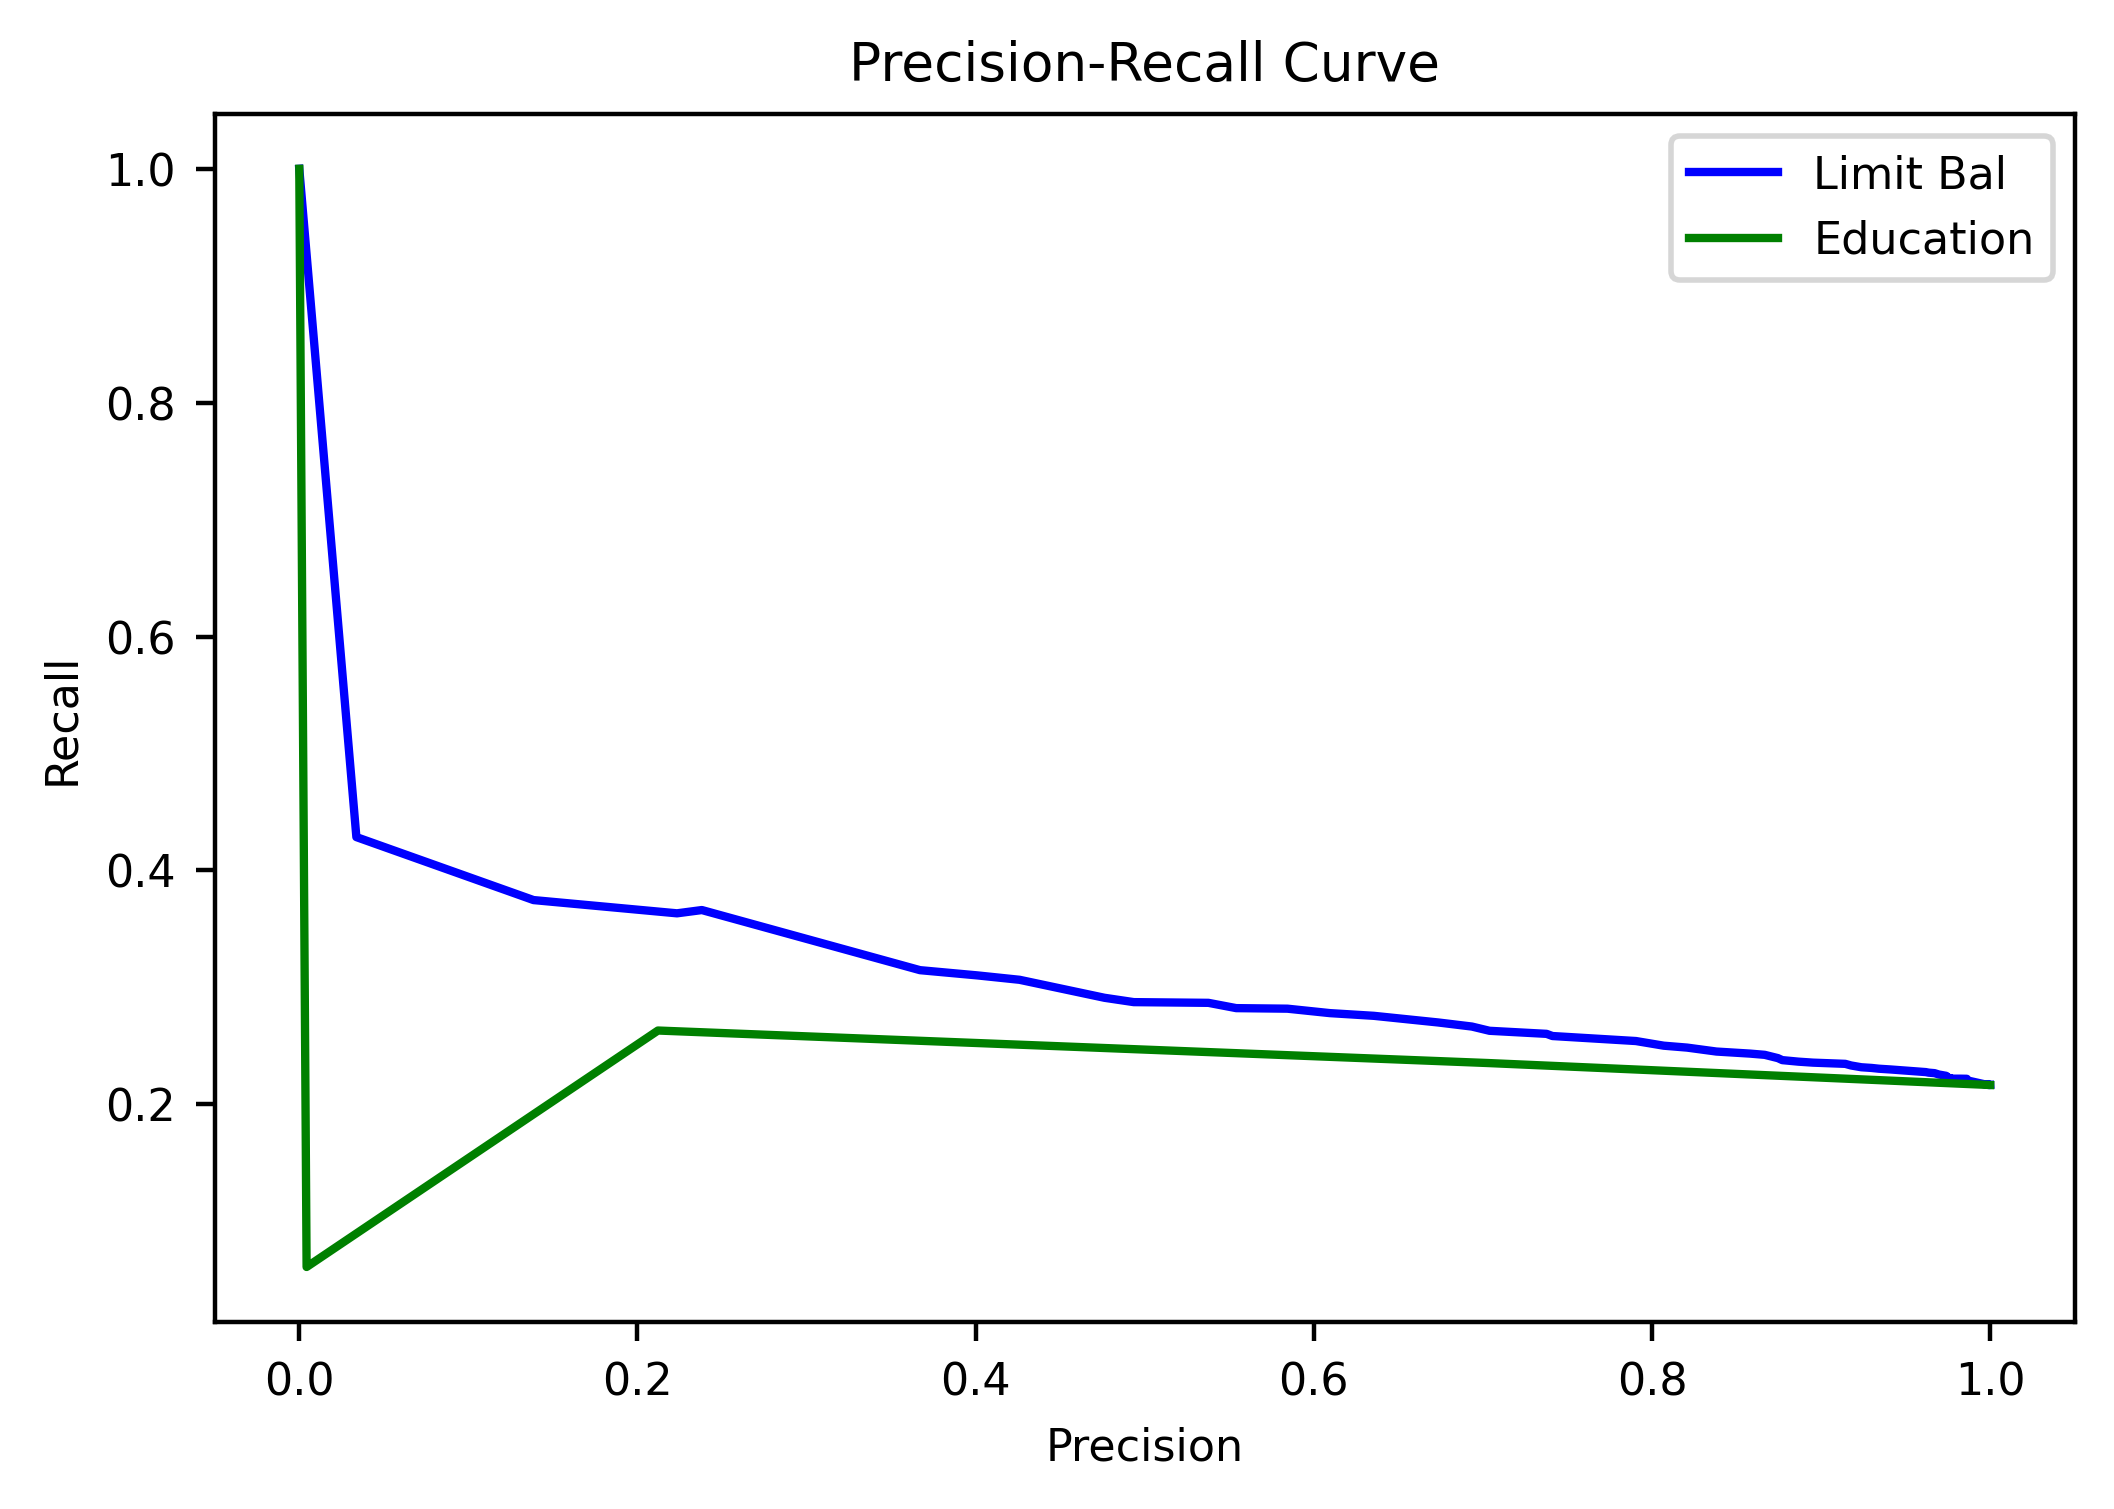

In [87]:
plt.plot(recall_act,precision_act,"b-")
plt.plot(recall,precision,"g-")
plt.legend(["Limit Bal", "Education"])
plt.title("Precision-Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [72]:
help(metrics.precision_recall_curve)

Help on function precision_recall_curve in module sklearn.metrics._ranking:

precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)
    Compute precision-recall pairs for different probability thresholds
    
    Note: this implementation is restricted to the binary classification task.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The last precision and recall values are 1. and 0. respectively and do not
    have a corresponding threshold.  This ensures that the graph starts on the
    y axis.
    
  

In [75]:
metrics.auc(recall_act,precision_act)

0.31566964427378624

In [83]:
activity_logistic_reg_train = LogisticRegression()
activity_logistic_reg_train.fit(X_train_act,Y_train_act)
predicted_probabilities_train = activity_logistic_reg_train.predict_proba(X_train_act)
positive_predicted_probabilities_train = predicted_probabilities_train[:,1]
metrics.roc_auc_score(Y_train_act, positive_predicted_probabilities_train)

0.6182918113358344